# Regression Trees 

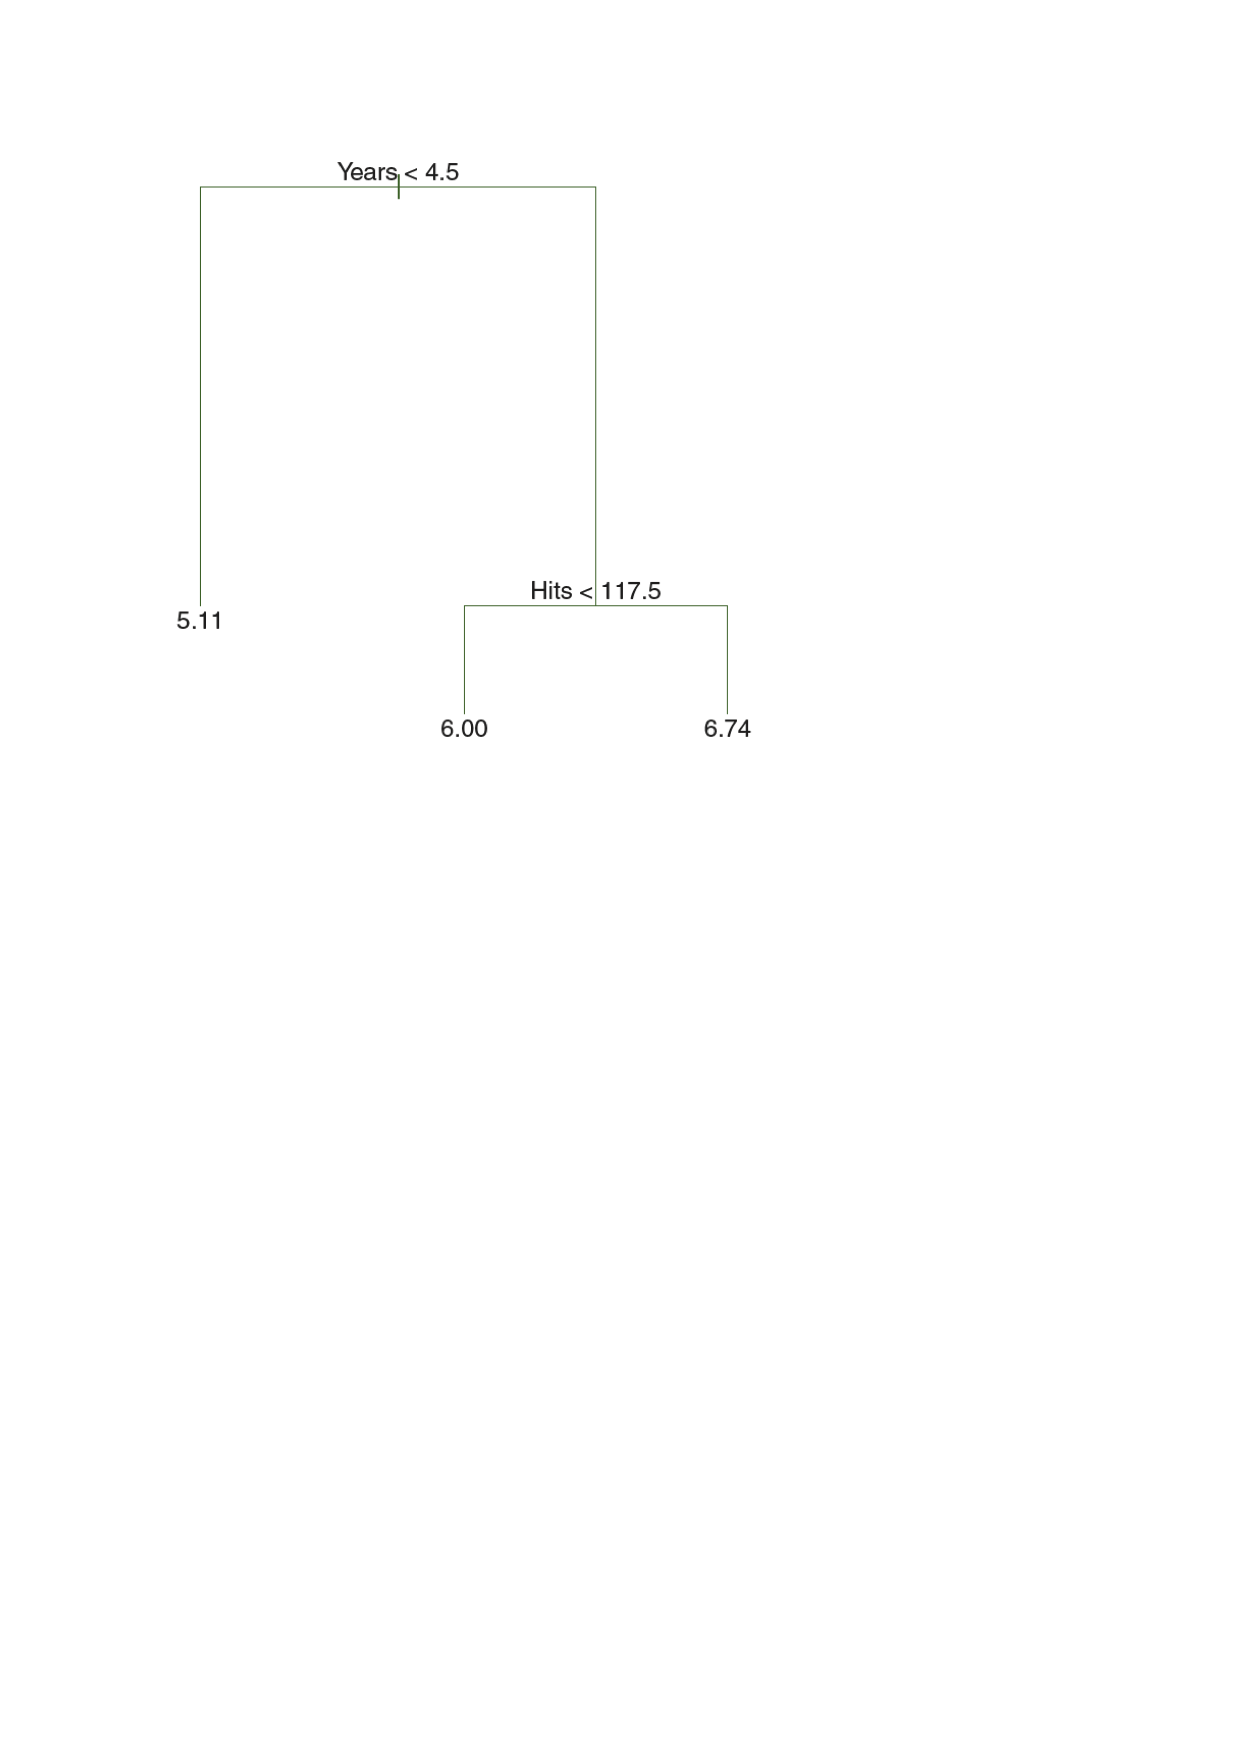

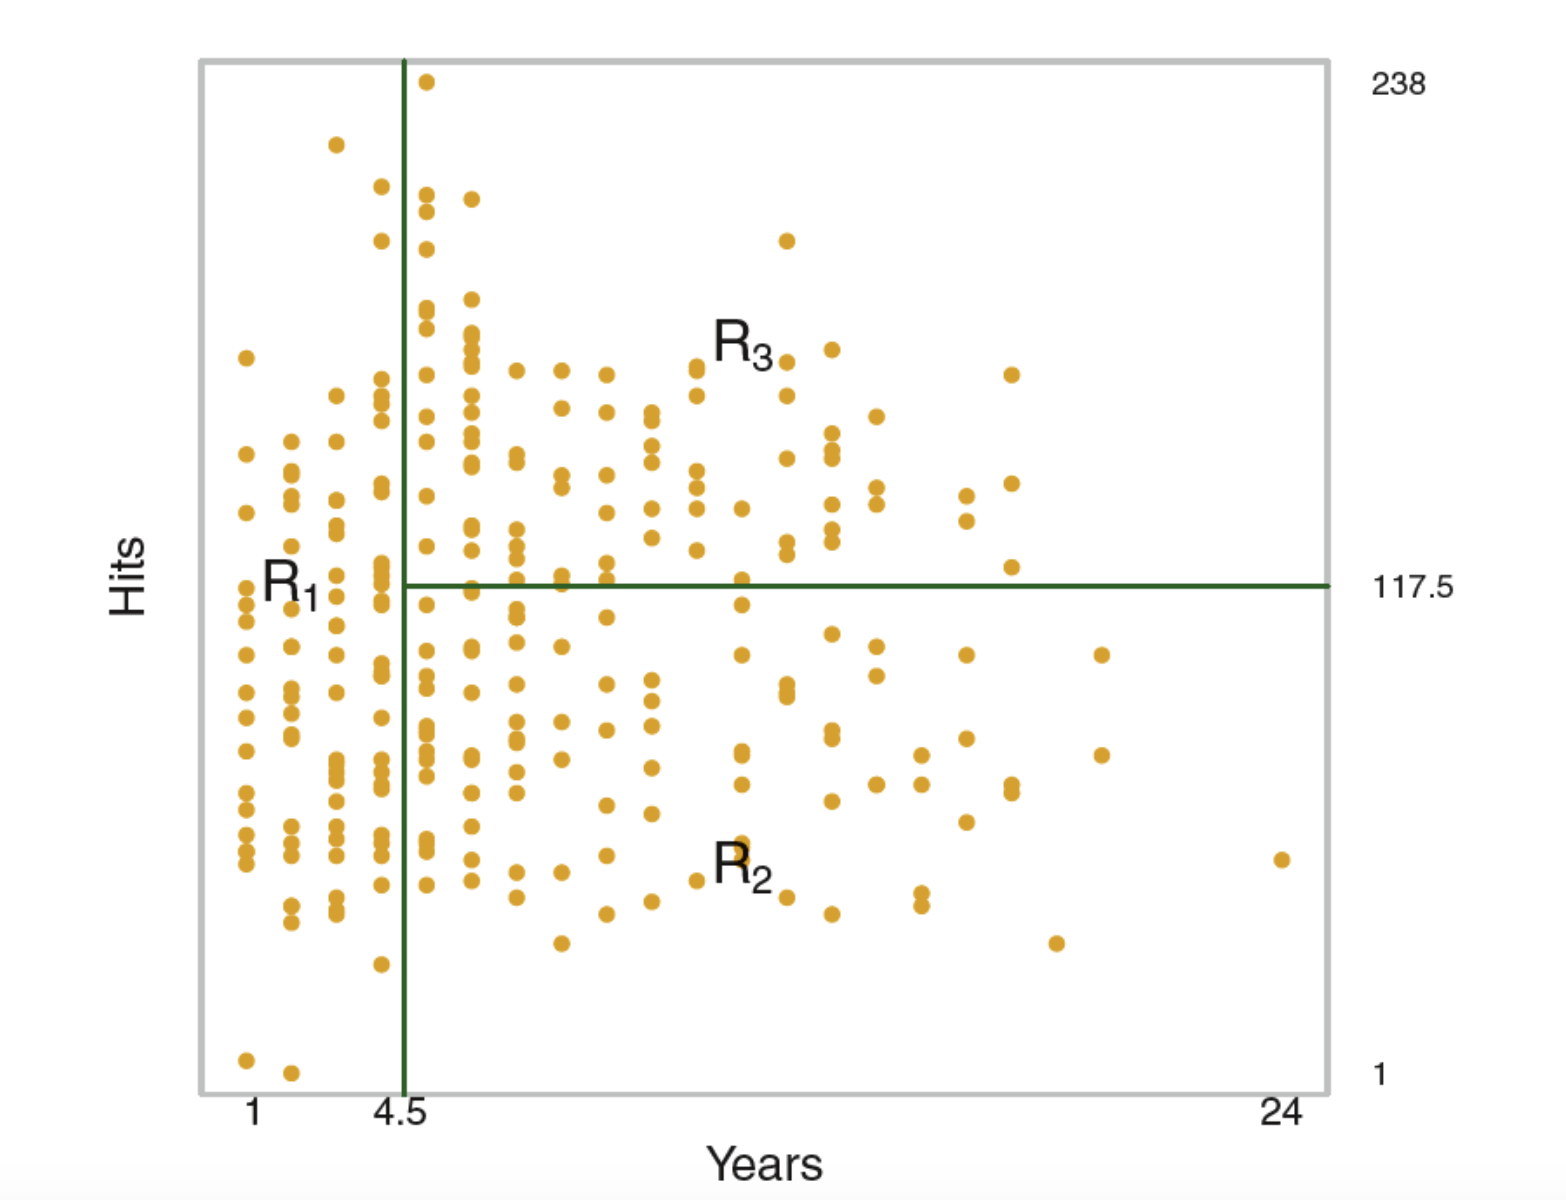

$$R_{1}=\{X | \text { Years }<4.5\}, R_{2}=\{X | \text { Years }>=4.5 \mathrm{~ H i t s < 1 1 7 . 5 \}}, $$
$$ \mathrm{~ a n d ~} R_{3}=\{\mathrm{X} | \text { Years }>=4.5, \text { Hits }>=117.5\}$$

General terminology:


- R1, R2, and R3: terminal nodes/leaves.
- points along the tree where the predictor space
is split: internal nodes.
- segments of the trees that connect the nodes: branches



## How to build a regression tree


- We divide the predictor space—that is, the set of possible values for $X_{1}, X_{2}, \ldots, X_{p}$ into J distinct and non-overlapping regions, $R_{1}, R_{2}, \ldots, R_{J}$. 
- For every observation that falls into the region $R_{j}$: make the same
prediction, mean of response values for the training observations in $R_{j}$.



**Example**

Suppose that in Step 1 we obtain two regions, $R_1$ and $R_2$. Mean of obs. in $R_1$ =10, mean of obs. in $R_2$ =20. Then for a given observation $X=x$ if $x\in R_1$ we predict 10, otherwise we predict 20. 



**In general How do we construct the regions $R_{1}, \dots, R_{J}$?**



The goal: find boxes $R_{1}, \ldots, R_{J}$ that minimize the RSS given by

\begin{equation}
\sum_{j=1}^{J} \sum_{i \in R_{j}}\left(y_{i}-\hat{y}_{R_{j}}\right)^{2}
\end{equation}


where $\hat{y}_{R_{j}}$ is the mean response for the training observations within the $j'$th box. 


But: computationally infeasible to consider every
possible partition of the feature space into $J$ boxes.



$\rightarrow$ take a top-down, greedy approach: recursive binary splitting.


### Recursive binary splitting

Consider all predictors $X_{1}, \ldots, X_{p}$ and all possible values of $s$ for each of
the predictors.  

Choose the predictor and cut-point such that the
resulting tree has the lowest RSS. 

For any $j$ and $s$: 
define the pair of half-planes
\begin{equation}
R_{1}(j, s)=\left\{X | X_{j}<s\right\} \text { and } R_{2}(j, s)=\left\{X | X_{j} \geq s\right\}
\end{equation}

and seek the value of $j$ and $s$ that minimize the equation 

\begin{equation}
\sum_{i : x_{i} \in R_{1}(j, s)}\left(y_{i}-\hat{y}_{R_{1}}\right)^{2}+\sum_{i : x_{i} \in R_{2}(j, s)}\left(y_{i}-\hat{y}_{R_{2}}\right)^{2}
\end{equation}

where $\hat{y}_{R_{1}}$: mean response for the training observations in $R_{1}(j, s)$ and $\hat{y}_{R_{2}}$: mean response for the training observations in $R_{2}(j, s)$. 

Next: repeat looking for the best predictor and best
cutpoint. 


This time: instead of splitting the
entire predictor space, split one of the two previously identified regions $\rightarrow$ three regions. 


Again: split one of these three regions
further, so as to minimize the RSS.


Continues until stopping
criterion is reached, e.g. until no region contains
more than five observations.


Once the regions $R_{1}, \ldots, R_{J}$ have been created, we predict the response
for a given test observation using the mean of the training observations in
the region to which that test observation belongs.

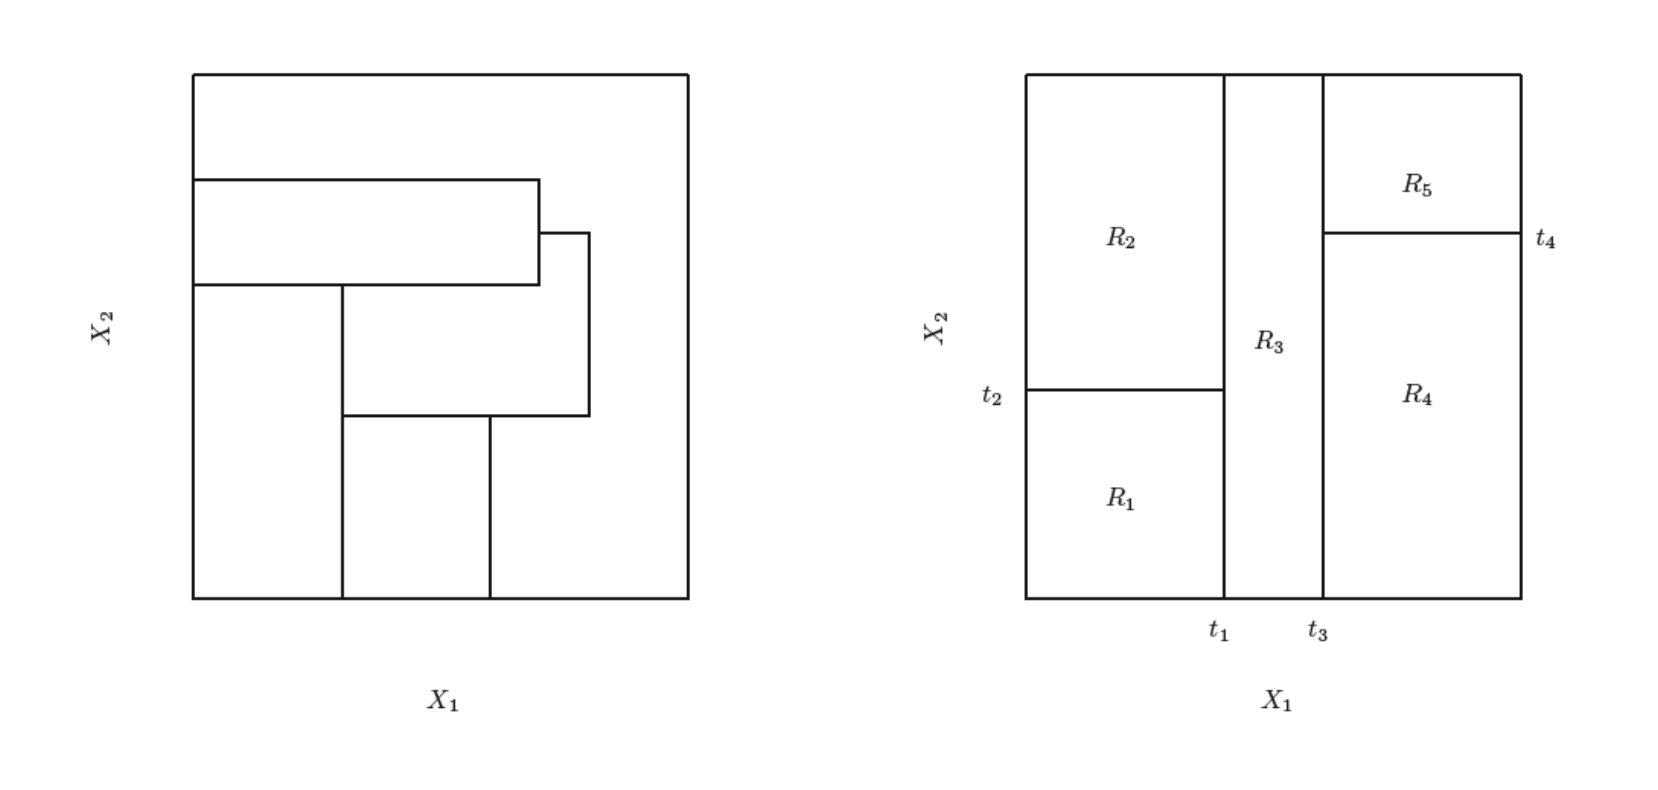

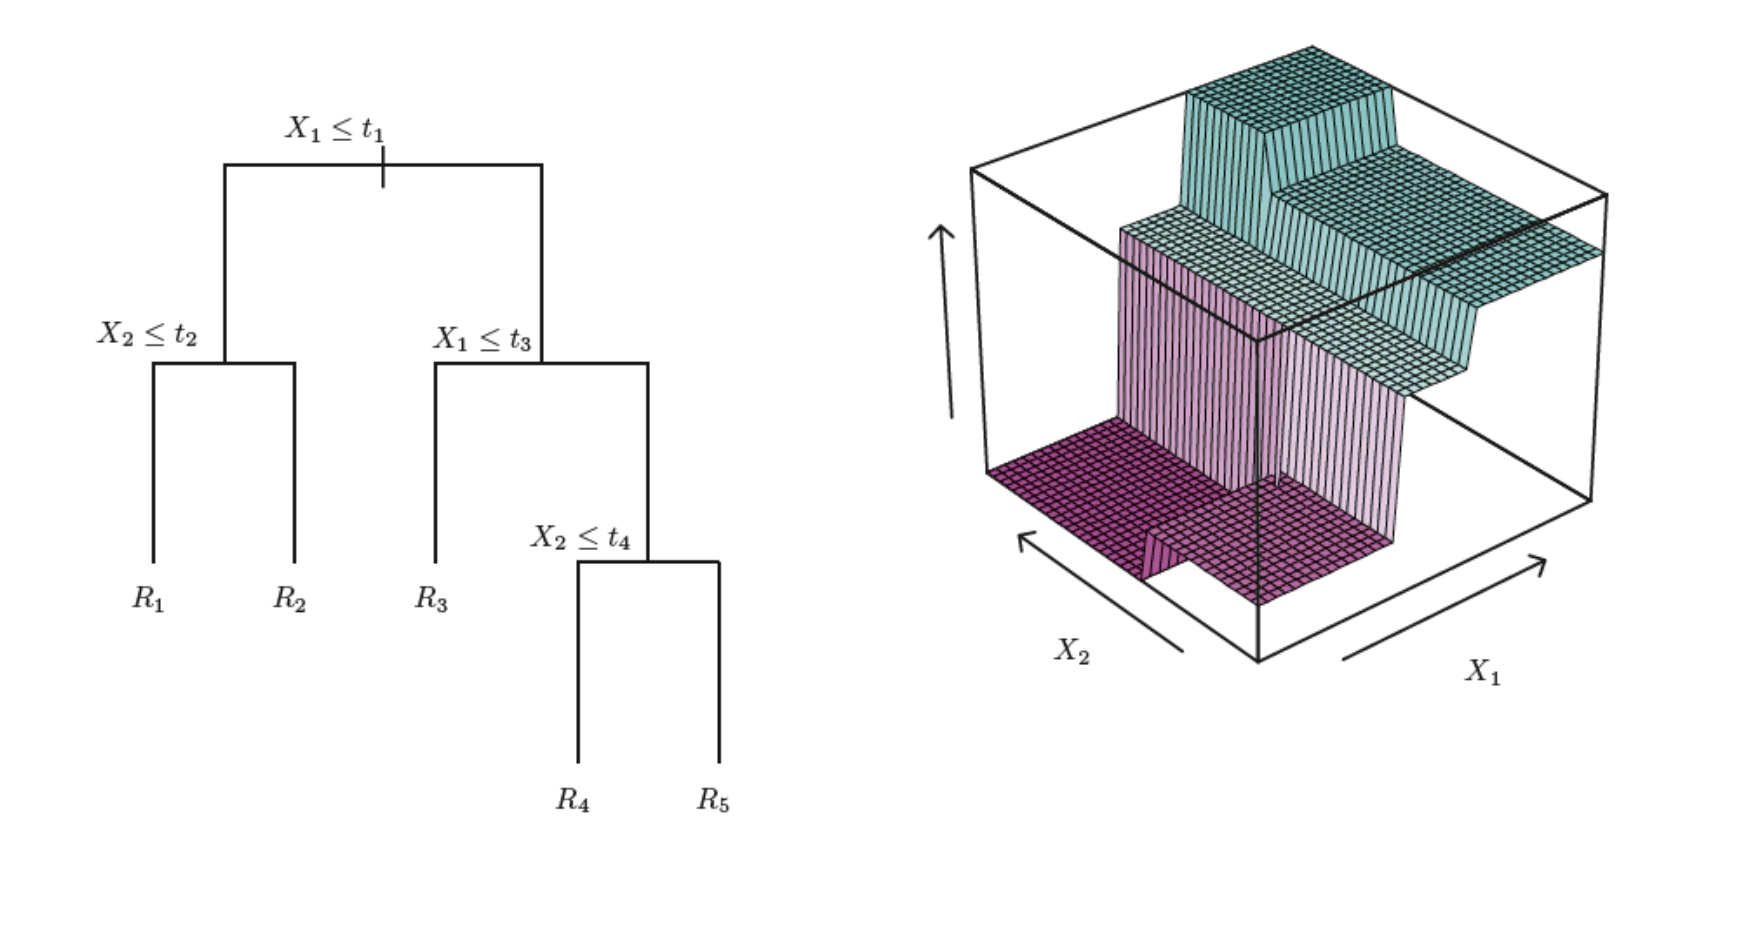

The process above: may produce good predictions training
set, likely to overfit and poor test set performance.


A smaller tree with fewer splits (i.e. fewer regions $R_{1}, \ldots, R_{J}$):  $\rightarrow$ lower
variance and better interpretation at the cost of a little bias.


Possible alternative: build the tree only so long
as the decrease in the RSS due to each split exceeds some (high) threshold.


But: maybe good split later on that we're missing out on? 

Therefore:  grow a very large tree $T_0$, and then
prune it back to obtain a subtree. 

Goal: select a subtree leads to the lowest test error rate.

Given a subtree, we can estimate its test error using cross-validation or the validation set approach. 

However: large number of subtrees $\rightarrow$ too cumbersome. 

Instead: select a small set of subtrees, cost complexity pruning—also known as weakest link pruning: consider a sequence of trees indexed by a nonnegative tuning parameter $\alpha$.

**Building a regression tree**

- Use recursive binary splitting to grow a large tree on the training
data, stopping only when each terminal node has fewer than some
minimum number of observations.
- Apply cost complexity pruning to the large tree in order to obtain a
sequence of best subtrees, as a function of $\alpha$.
- Use K-fold cross-validation to choose $\alpha$. That is, divide the training
observations into K folds. For each $k = 1, ...,K$:
- (a) Repeat Steps 1 and 2 on all but the $k$'th fold of the training data.
- (b) Evaluate the mean squared prediction error on the data in the left-out $k$'th fold, as a function of $\alpha$. 
- Average the results for each value of $\alpha$, and pick $\alpha$ to minimize the average error.
- Return the subtree from Step 2 that corresponds to the chosen value
of $\alpha$.



For each value of $\alpha$ there corresponds a subtree $T \subset T_{0}$ such that 
\begin{equation}\label{eq:reg_tree}
\sum_{m=1}^{|T|} \sum_{x_{i} \in R_{m}}\left(y_{i}-\hat{y}_{R_{m}}\right)^{2}+\alpha|T|
\end{equation}
is as small as possible.


- $|T|$: number of terminal nodes of the tree $T$
- $R_m$: rectangle (i.e. the subset of predictor space) corresponding
to the $m'$th terminal node, and
- $\hat{y}_{R_{m}}$ is the predicted response, i.e. the mean of the training observations in $R_m$.
- $\alpha|T|$ controls a trade-off between the subtree’s complexity and fit to the training data:



- $\alpha=0$:  subtree $T= T_0$, since \ref{eq:reg_tree} measures the training error.
- For $\alpha>0$: penalize too many terminal nodes $\rightarrow$ choose a smaller subtree.



Pruning occurs in a nested and predictable fashion, i.e. we can obtain the whole sequence of subtrees as a function of $\alpha$.

Select a value of $\alpha$ using a validation set or using cross-validation. 
  
Then return to the full data set and obtain the subtree corresponding to $\alpha$. 

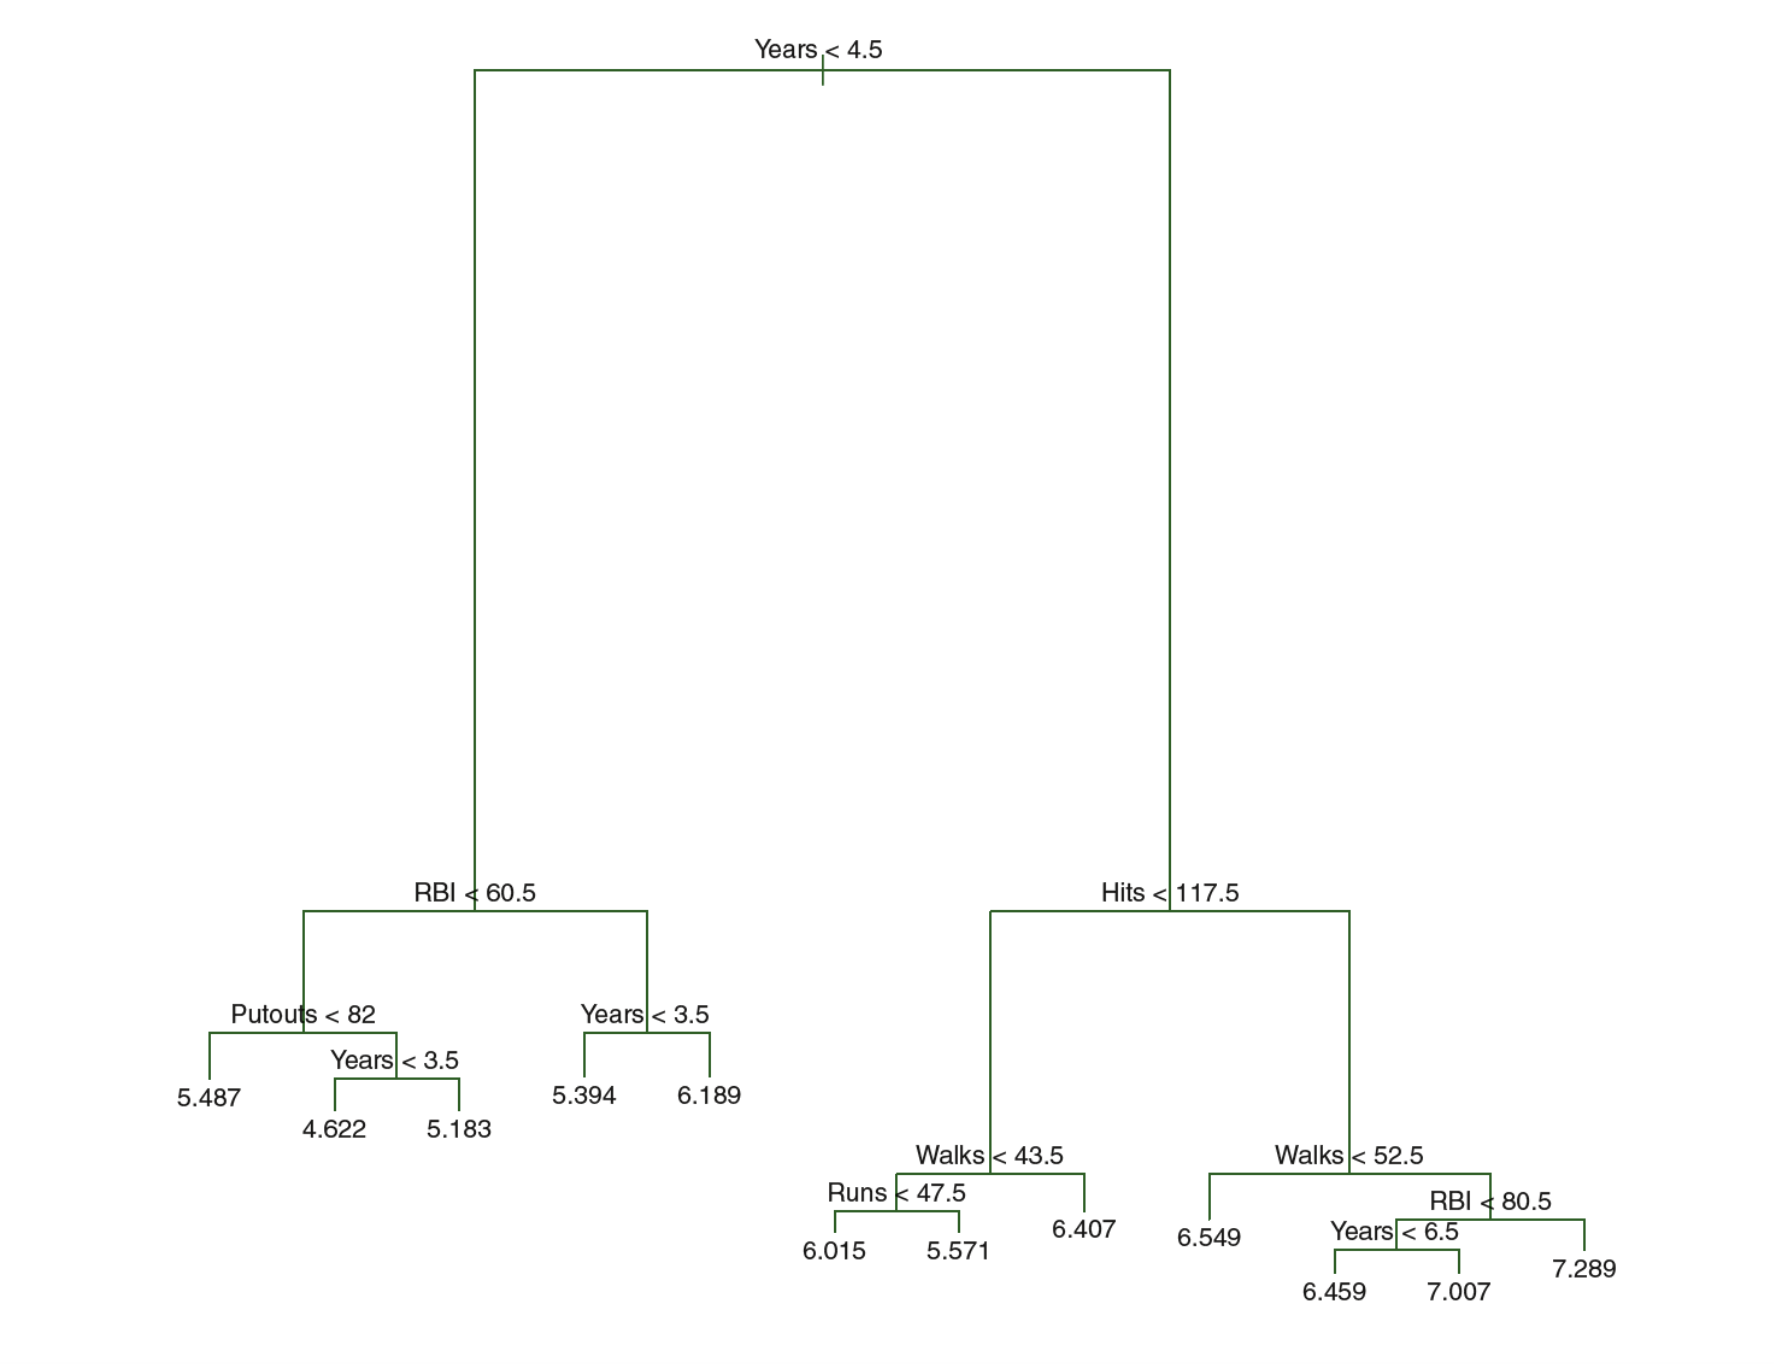

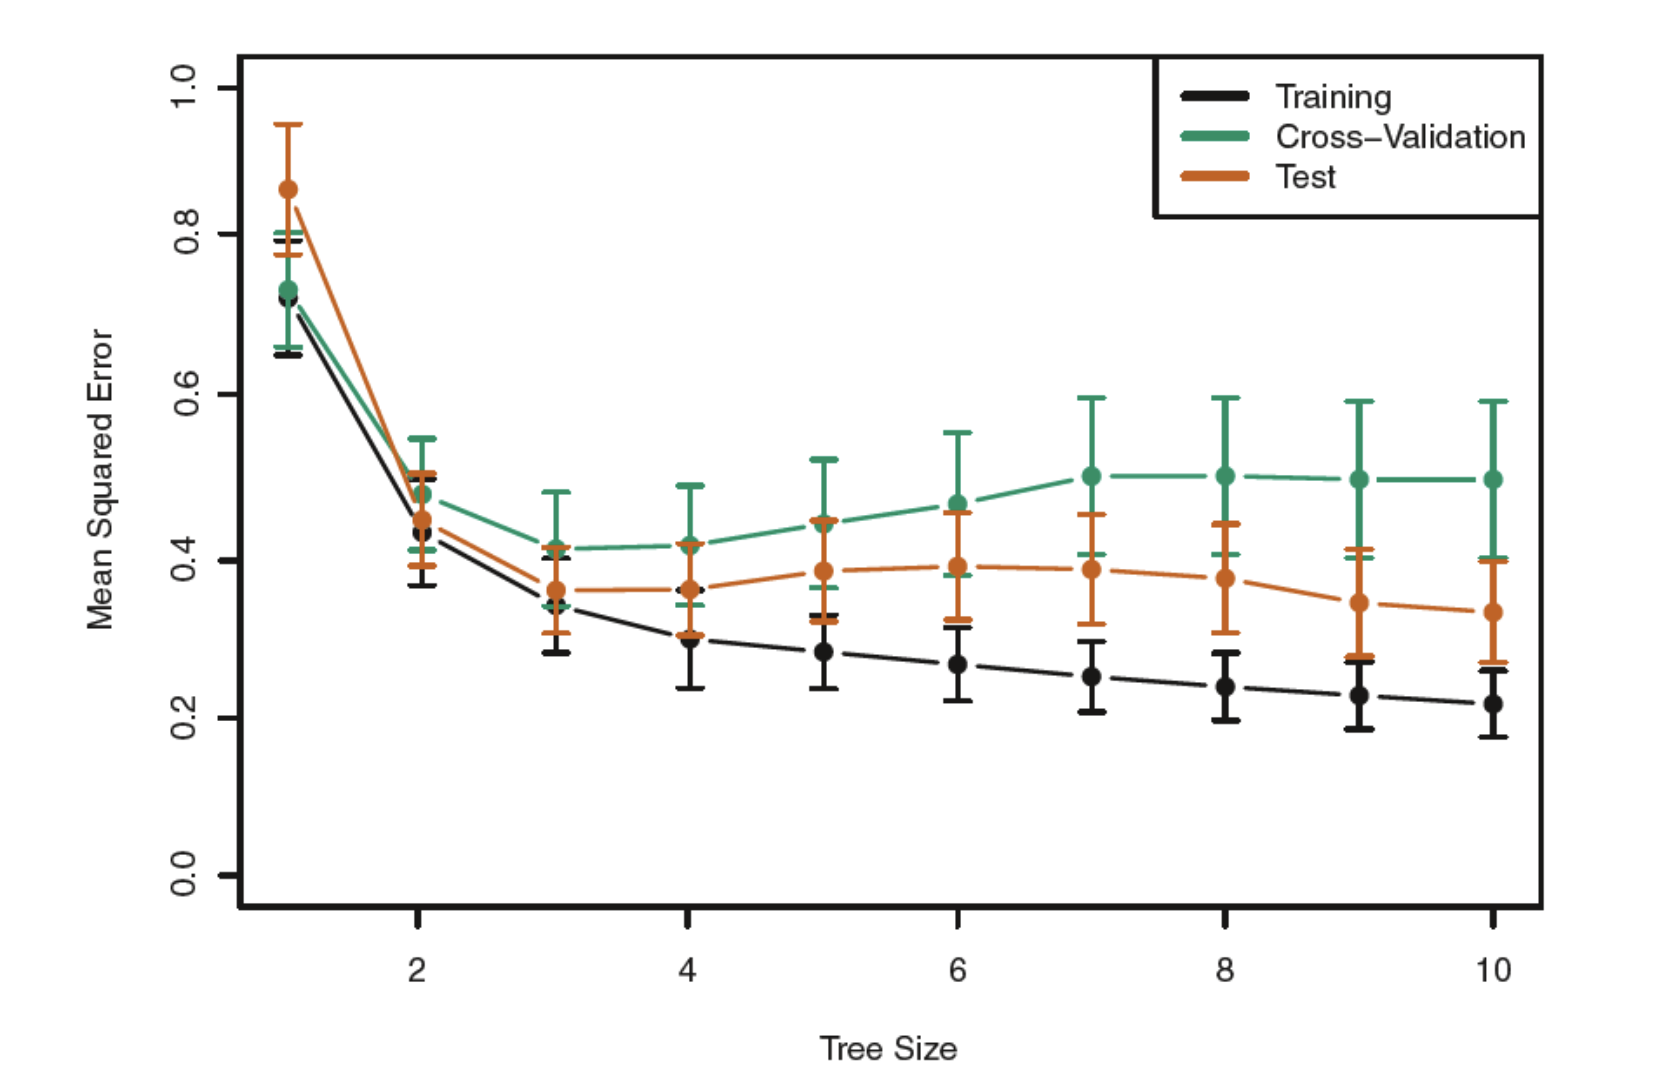

## Classification Trees

Predict: each observation belongs to the most commonly occurring class of training
observations in the region to which it belongs. 

Interpretation:

- class prediction corresponding to a particular terminal node region.
- class proportions among the training observations that fall into that region.

Alternative to RSS: classification error rate.

\begin{equation}
E=1-\max _{k}\left(\hat{p}_{m k}\right)
\end{equation}

$\hat{p}_{m k}$: proportion of training observations in the $m$'th
region, from the $k'$th class.

However: classification error is not sufficiently sensitive for tree-growing.






### Gini Index

The Gini index is defined by

\begin{equation}
G=\sum_{k=1}^{K} \hat{p}_{m k}\left(1-\hat{p}_{m k}\right)
\end{equation}

a measure of total variance across the K classes. 

An alternative to the Gini index is cross-entropy, given by

\begin{equation}
D=-\sum_{k=1}^{K} \hat{p}_{m k} \log \hat{p}_{m k}
\end{equation}

$0 \leq \hat{p}_{m k} \leq 1$ it follows that $0 \leq-\hat{p}_{m k} \log \hat{p}_{m k}$.


**Summarizing:**

- Both Gini and cross-entropy measures are lower, the ``purer" the nodes are.
- Gini and cross-entropy: good for building the tree
- Class-error rate: used for pruning the tree.



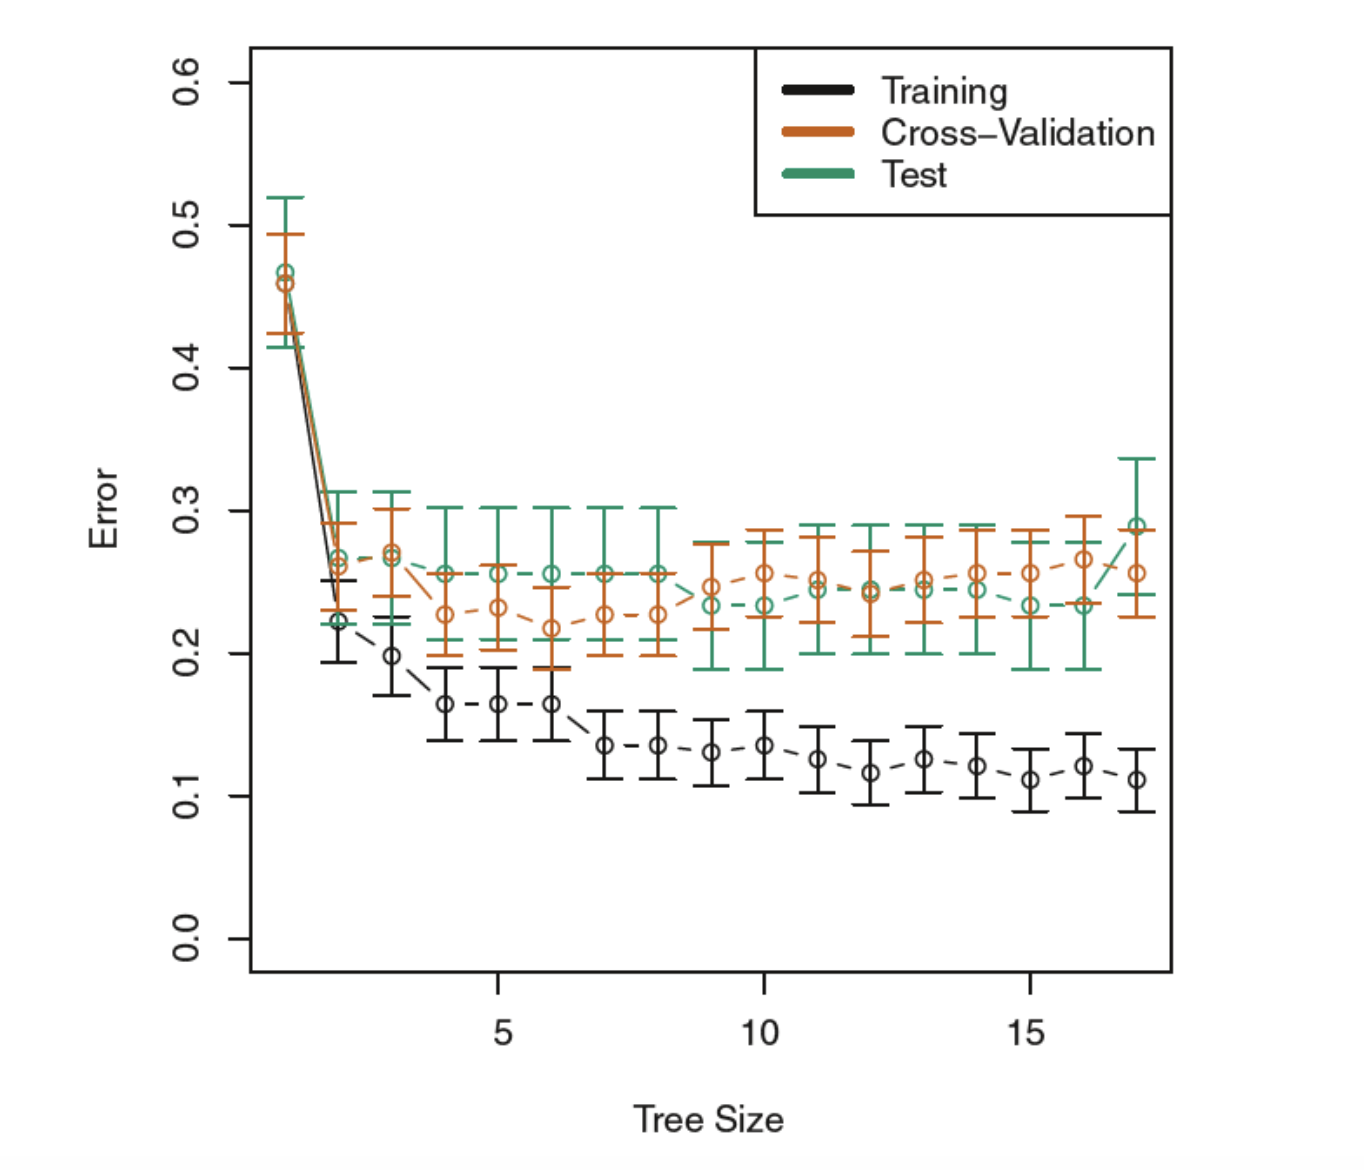

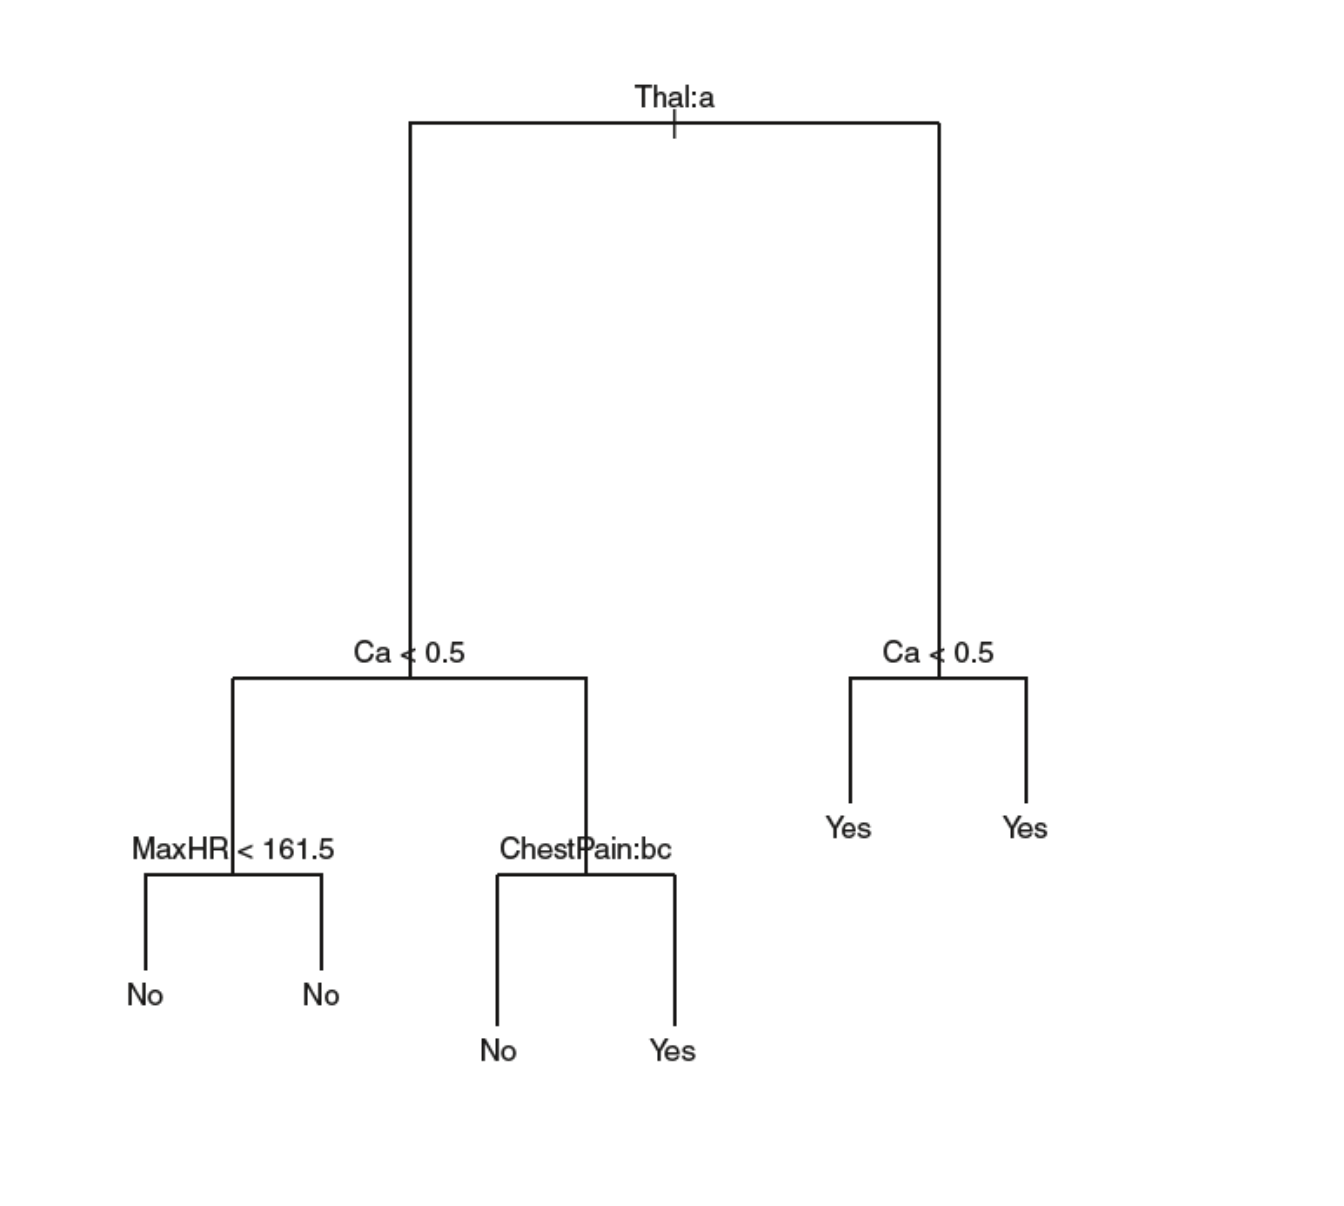

## Linear Regression vs.Trees


Linear regression assumes the functional form

\begin{equation}
f(X)=\beta_{0}+\sum_{j=1}^{p} X_{j} \beta_{j}
\end{equation}

while tree based methods assume that 

\begin{equation}
f(X)=\sum_{m=1}^{M} c_{m} \cdot 1_{\left(X \in R_{m}\right)}
\end{equation}

where the $R_m$ are defined as the partitions of the feature space. 


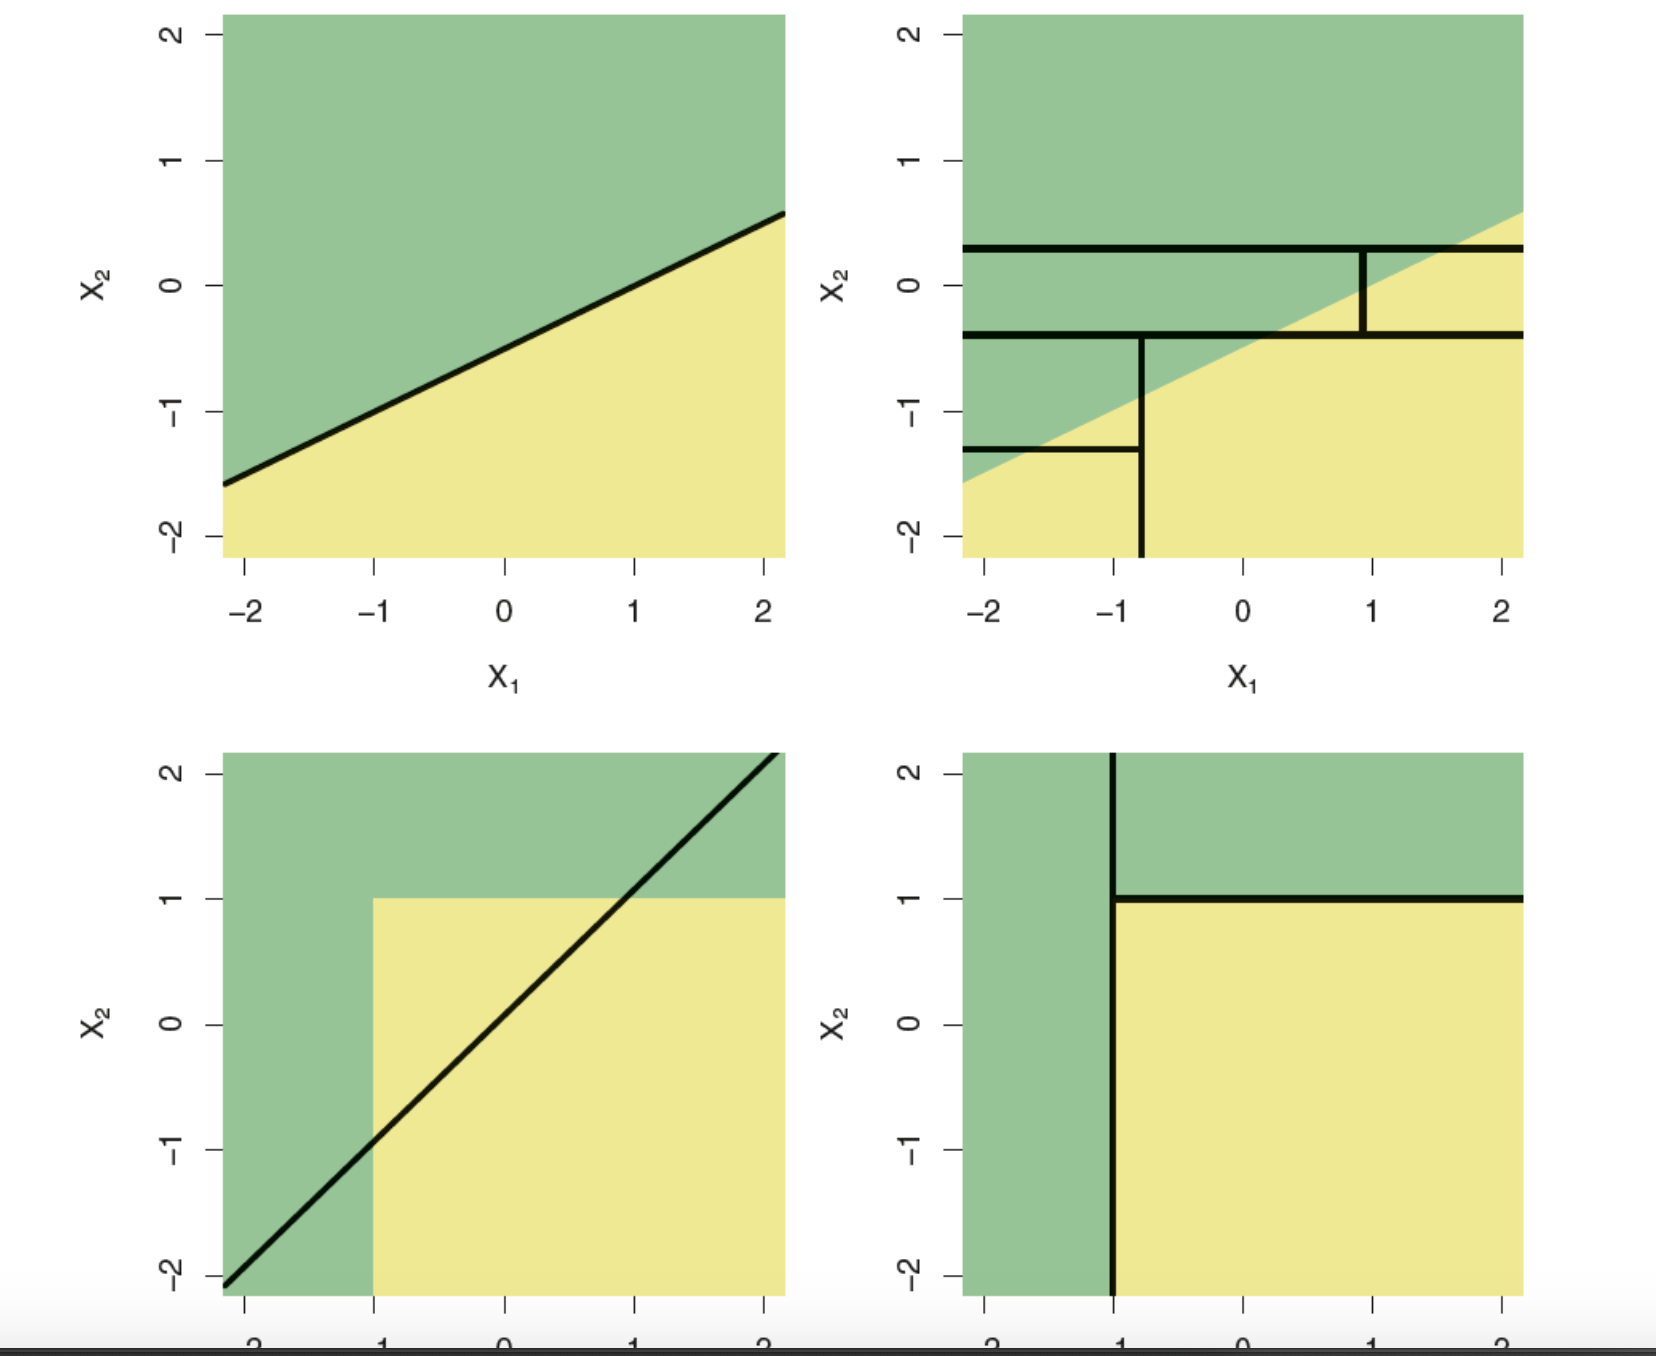

**Advantages and disadvantages of trees:**


- Trees are very easy to explain, results do not depend on complicated functional form assumptions.
-  Some people believe that decision trees more closely mirror human
decision-making than do the regression and classification approaches
seen in previous chapters.
- Trees can be displayed graphically, and are easily interpreted even by
a non-expert (especially if they are small).
- Trees can easily handle qualitative predictors without the need to
create dummy variables.
- Unfortunately, trees generally do not have the same level of predictive
accuracy as some of the other regression and classification approaches.


## Bagging, Boosting, Random Forests

### Bagging

Idea: Use the bootstrap to improve statistical learning tools. 

Decision trees above: suffer from high variance.

Linear regression: has low variance, if the ratio of $n to p$ is moderately large. 

Bootstrap aggregation, or bagging: general-purpose procedure for reducing the variance of a statistical learning method.

Recall:  RVs $Z_{1}, \ldots, Z_{n}$, each with variance $\sigma^2$.  Variance of $\bar{Z}$: $\sigma^{2} / n$. 

$\rightarrow$ averaging should reduce the variance of our estimates. 



- Take B separate training sets from the population
- build a separate prediction model using each training set  $\hat{f}^{1}(x), \hat{f}^{2}(x), \ldots, \hat{f}^{B}(x)$
- average the resulting predictions $\hat{f}^{1}(x), \hat{f}^{2}(x), \ldots, \hat{f}^{B}(x)$



But: we usually do not have many training data sets: Bootstrap. 


Train on the $b$'th bootstrapped training set to get $\hat{f}^{* b}(x)$ and average
all the predictions, to obtain 

\begin{equation}
\hat{f}_{\mathrm{bag}}(x)=\frac{1}{B} \sum_{b=1}^{B} \hat{f}^{* b}(x)
\end{equation}

In general: more suited to decision trees than regression trees. How can we predict classification problems with qualitative $Y$?


For a given test
observation, record the class predicted by each of the B trees and take majority vote: overall prediction: most commonly occurring
majority class among the B predictions.



**Bagging for decision trees**

The simplest approach: For a given test observation: record the class predicted by each of the $B$ trees, take a majority vote: the overall prediction is the most commonly occurring
majority class among the $B$ predictions.


**How to estimate the test error?**


Obvious answer: cross-validation. But: computationally difficult, validation set has a high variance. 


But: a straightforward way to estimate the test error: Out-of-bag estimation.


Method: key to bagging is that trees are repeatedly fit to bootstrapped subsets of the observations.


One can show: on average, each bagged tree makes use of around two-thirds of the observations. remaining one-third of the observations not used to fit a given bagged tree are referred to as the out-of-bag (OOB) observations.
 

- predict the response for the $i$'th observation using each of the trees in which that observation was OOB.
- yields around B/3 predictions for the $i'$th observation.
-  average these predicted responses (for regression) or take majority vote (classification).
- [$\rightarrow$] yields single OOB prediction.
- obtain OOB prediction for each of the $n$ observations and calculate the classification error.


It can be shown that with $B$ sufficiently large, OOB error is virtually equivalent
to leave-one-out cross-validation error.





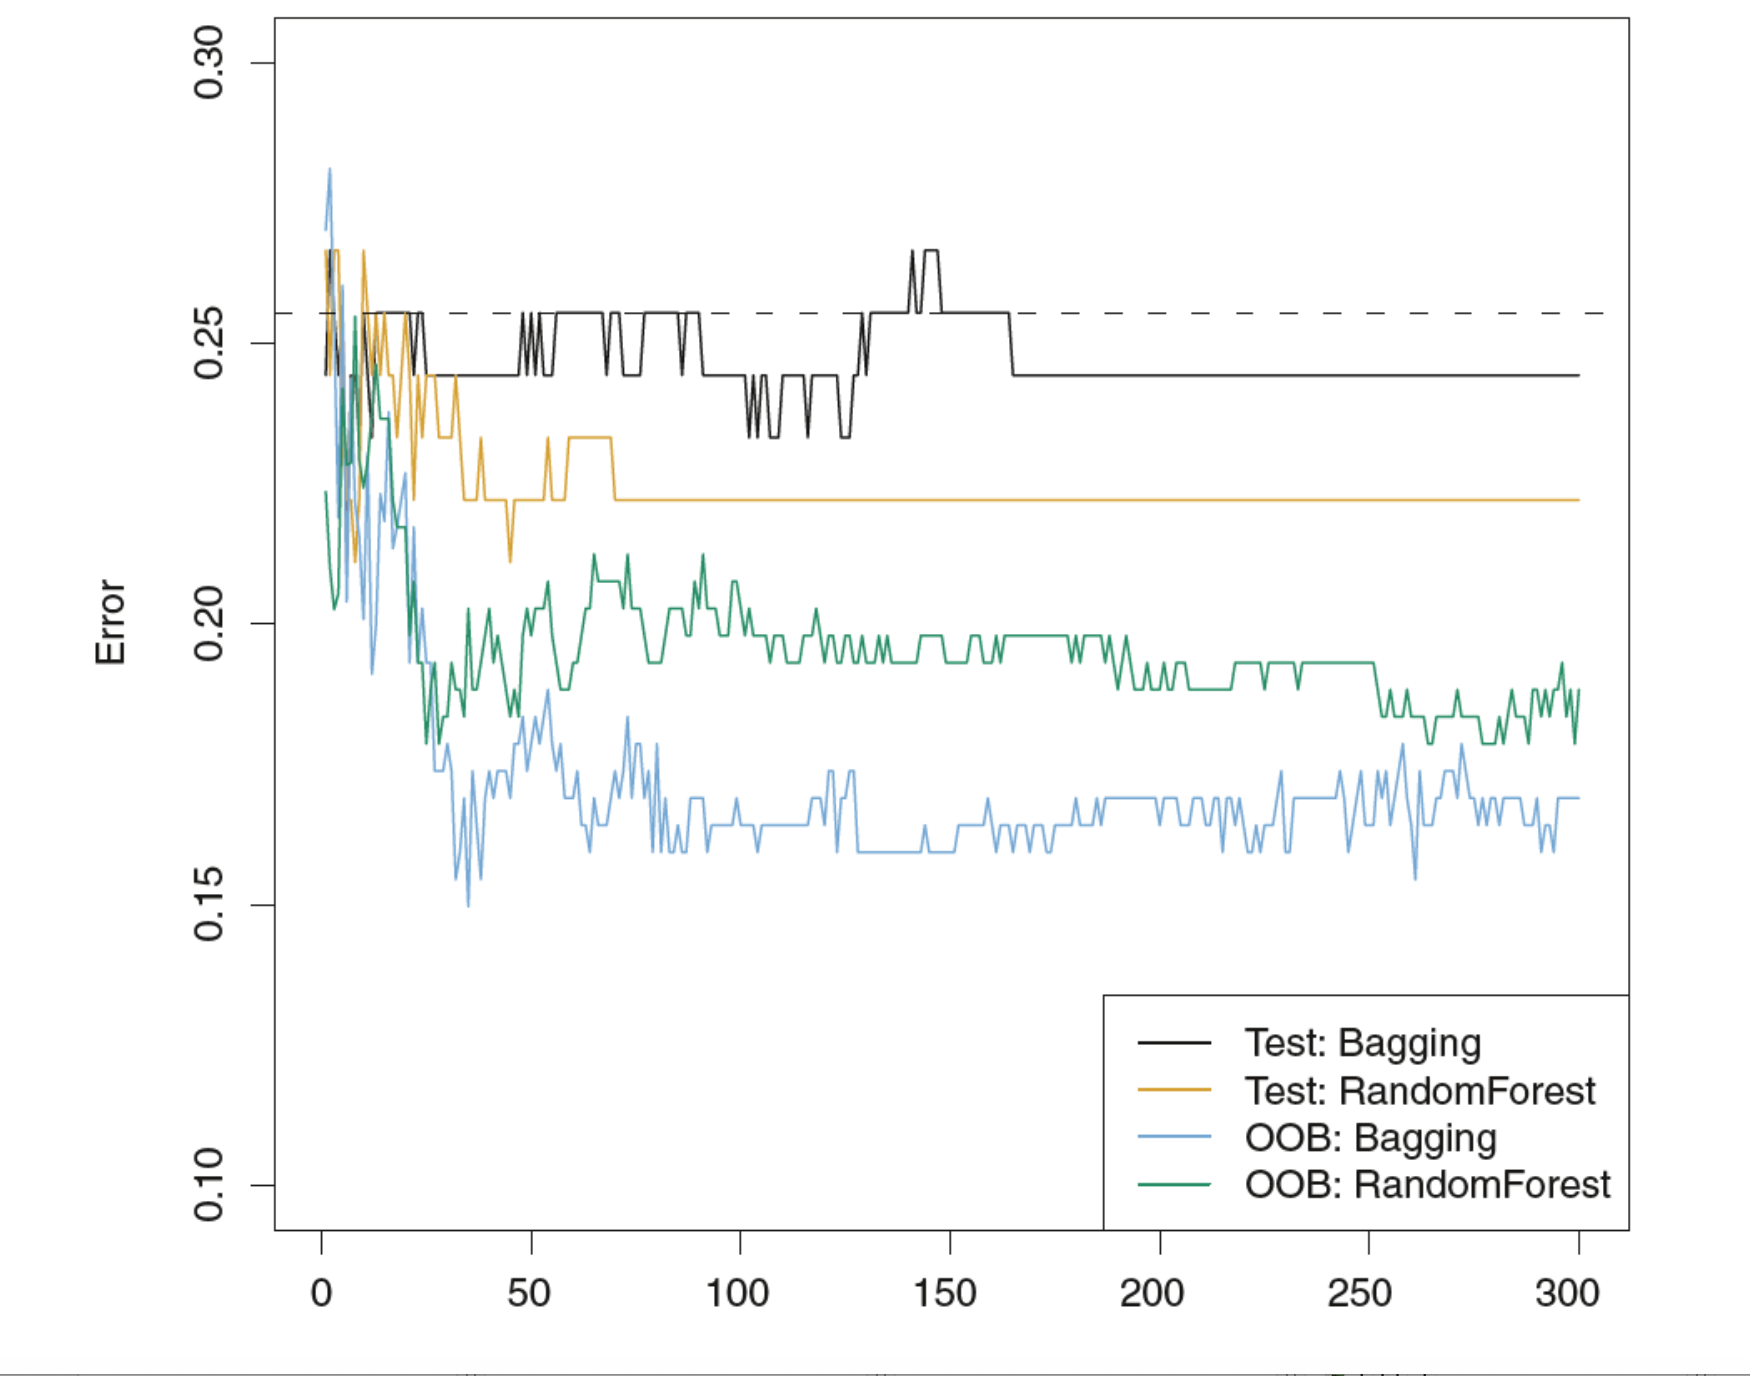

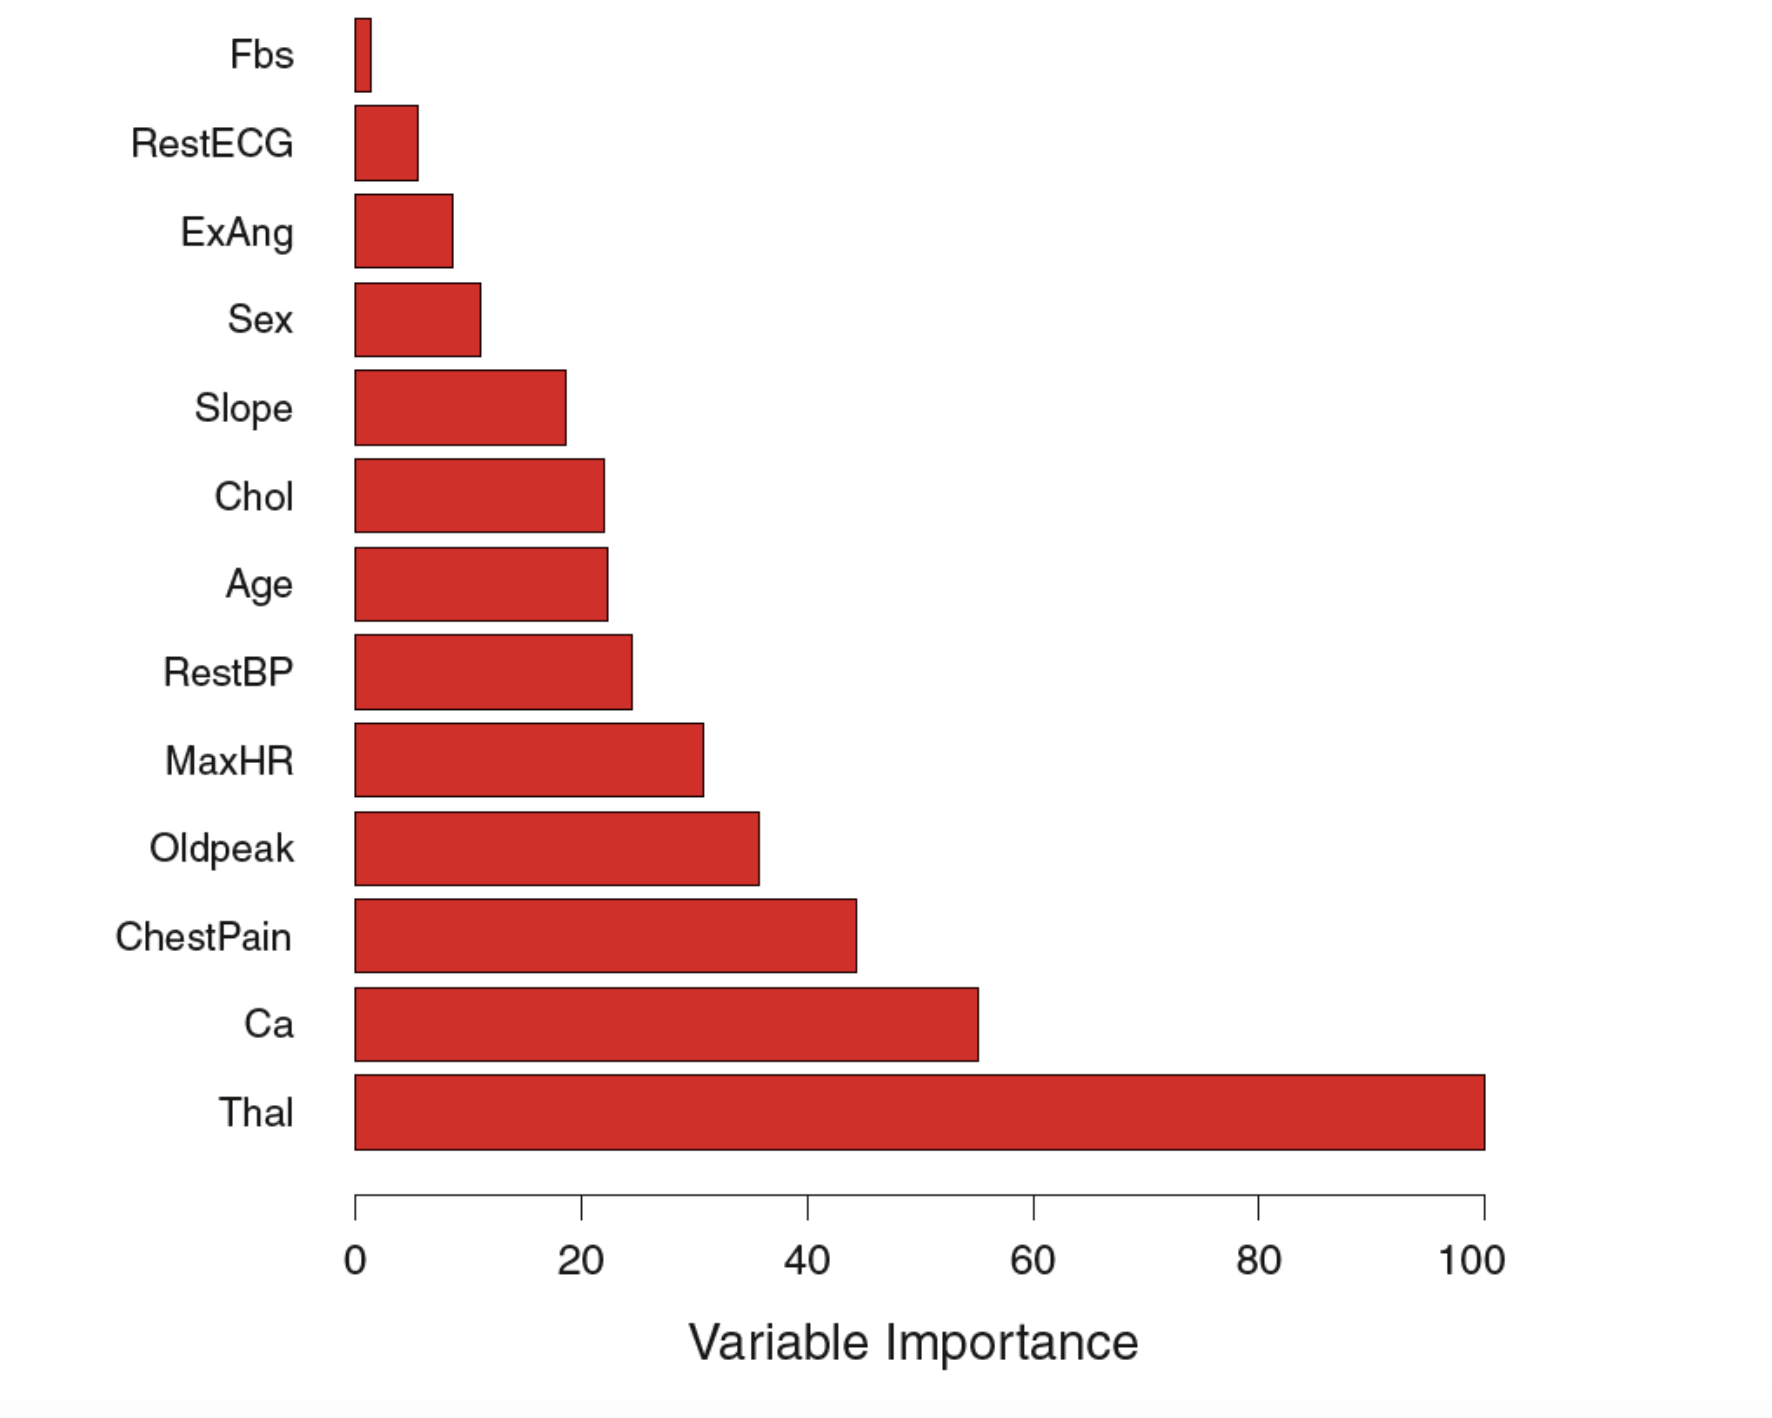

### Random Forests

Random forests: improve bagging by decorrelating the trees. 



- build a forest of decision trees bootstrapped training samples.
- but: each time a split in a tree is considered, a random sample of
$m$ predictors is chosen as split candidates from the full set of $p$ predictors.
- fresh sample of $m$ predictors is taken at each split
- typical choice: $m \approx \sqrt{p}$.


Why? Suppose that one very strong predictor and other moderately strong predictors. Bagged
trees, most or all of the trees will use this strong predictor in the top split.


Why does this matter? Averaging correlated quantities will not reduce variance in the same magnitude as uncorrelated quantities.


In particular: bagging will not lead to a substantial
reduction in variance over a single tree in this setting. 


Random forests: force each split to consider only a subset of the predictors. 


Therefore, on average $(p-m) / p$ of the
splits will not consider the strong predictor%, and so other predictors
%will have more of a chance. We can think of this process as decorrelating
%the trees, thereby making the average of the resulting trees less variable
%and hence more reliable. The 


Main difference between bagging and random forests: choice of predictor subset size $m$. 


Figure above: random
forests using $m=\sqrt{p}$ leads to a reduction in both test error and OOB error
over bagging.



### Boosting

**Boosting: convert weak learners to strong learners.**


**Example** 

Predict exam failure
Suppose we had the following weak predictors: 

- Missed more than three lectures
- Missed more than one class assignment
- Looked at their phone at least 5 minutes during every lecture
- Talked with their neighbor for more than 2 minutes each lecture


Individually: weak predictors, but combined: become stronger. Take majority vote: if 3 out of 5 yes: much better predictor for failure.


So: idea of boosting: easy to find rules of thumb that are often correct. 
hard to find single highly accurate prediction
rule.

$\rightarrow$ data collection is costly! 

Recall that bagging involves creating multiple copies of the original training
data set using the bootstrap, fitting a separate decision tree to each
copy, and then combining all of the trees in order to create a single predictive
model. Notably, each tree is built on a bootstrap data set, independent of the other trees. Boosting works in a similar way, except that the trees are
grown sequentially: each tree is grown using information from previously
grown trees. Boosting does not involve bootstrap sampling; instead each
tree is fit on a modified version of the original data set.



**Boosting more formally: **


- fit a tree using the current residuals, rather than the outcome $Y$, as the response.
- add this new decision tree into the fitted function in order to update the residuals.
- Number of terminal nodes: $d$, usually 1 or 2! 
- By fitting small trees to the residuals, we slowly improve $\hat{f}$ in areas where it
does not perform well. 
- shrinkage parameter slows the process down
even further, allowing more and different shaped trees to attack the residuals. construction of
each tree depends strongly on the trees that have already been grown. 
